In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn import feature_extraction

In [3]:
df = pd.read_csv('./Dataset/Language Detection.csv')

In [4]:
punctuation_list = string.punctuation

def remove_punctuation(text):
    for pun in punctuation_list:
        text = text.replace(pun, "")
    text = text.lower()
    return (text)

In [5]:
df['Text'] = df['Text'].apply(remove_punctuation)

df['Text'].head()

0     nature in the broadest sense is the natural p...
1    nature can refer to the phenomena of the physi...
2    the study of nature is a large if not the only...
3    although humans are part of nature human activ...
4    1 the word nature is borrowed from the old fre...
Name: Text, dtype: object

In [6]:
text = df['Text']
language = df['Language']
x_train, x_test, y_train, y_test = train_test_split(text, language, test_size=0.2, random_state=42)

In [7]:
tfidf = feature_extraction.text.TfidfVectorizer(ngram_range=(2, 3), analyzer='char')

In [8]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'NaiveBayes': MultinomialNB(),
    'SVM': SVC()
}

results = {}

In [9]:
for model_name, model in models.items():
    pipe = Pipeline([('tfidf', tfidf), ('clf', model)])

    param_grid = {
        'tfidf__ngram_range': [(1, 2), (2, 3)],
        'tfidf__max_features': [5000, 10000, None]
    }
    
    if model_name == 'LogisticRegression' or model_name == 'SVM':
        param_grid['clf__C'] = [0.1, 1, 10]
    
    grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    y_pred = grid_search.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = {'Best Params': grid_search.best_params_, 'Accuracy': accuracy, 'F1 Score': f1}

    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))



LogisticRegression Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       0.91      0.97      0.94        73
       Dutch       0.98      0.98      0.98       111
     English       0.97      1.00      0.98       291
      French       0.99      0.98      0.99       219
      German       0.99      0.96      0.97        93
       Greek       1.00      0.99      0.99        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.98      0.97      0.98       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.99      1.00       121
  Portugeese       0.97      0.98      0.98       144
     Russian       0.99      1.00      0.99       136
     Spanish       0.99      0.97      0.98       160
    Sweedish       0.98      0.96      0.97       133
       Tamil       1.00      1.00      1.00        87
     Turkish       1.00      1.00    

In [10]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:\n", results_df)


Model Performance Summary:
                                                           Best Params  \
LogisticRegression  {'clf__C': 10, 'tfidf__max_features': None, 't...   
NaiveBayes          {'tfidf__max_features': 5000, 'tfidf__ngram_ra...   
SVM                 {'clf__C': 10, 'tfidf__max_features': None, 't...   

                    Accuracy  F1 Score  
LogisticRegression  0.984043  0.984081  
NaiveBayes          0.979207  0.979063  
SVM                 0.983075  0.983105  


C:\Users\corne\AppData\Local\Temp\ipykernel_25056\973405799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='viridis')


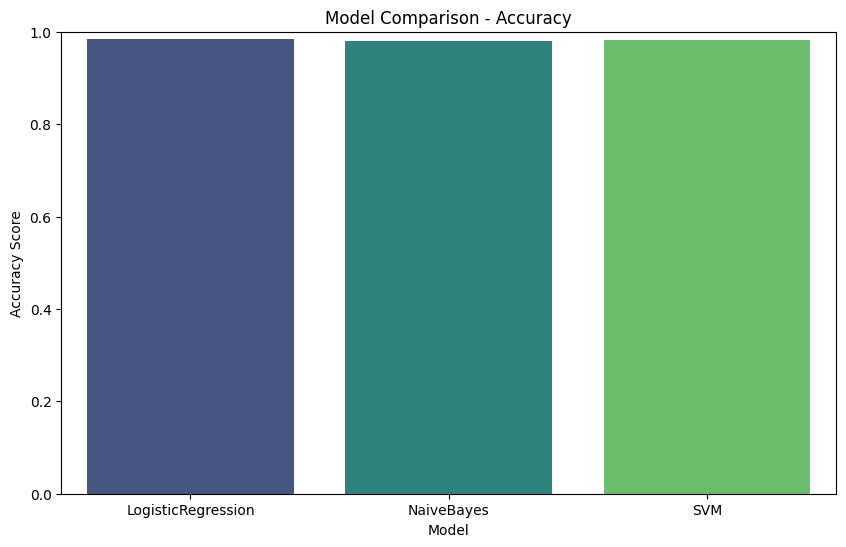

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='viridis')
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.show()

In [12]:
best_model = LogisticRegression(C=results['LogisticRegression']['Best Params']['clf__C'], max_iter=1000)
best_pipe = Pipeline([('tfidf', tfidf), ('clf', best_model)])
best_pipe.fit(x_train, y_train)
y_pred_best = best_pipe.predict(x_test)

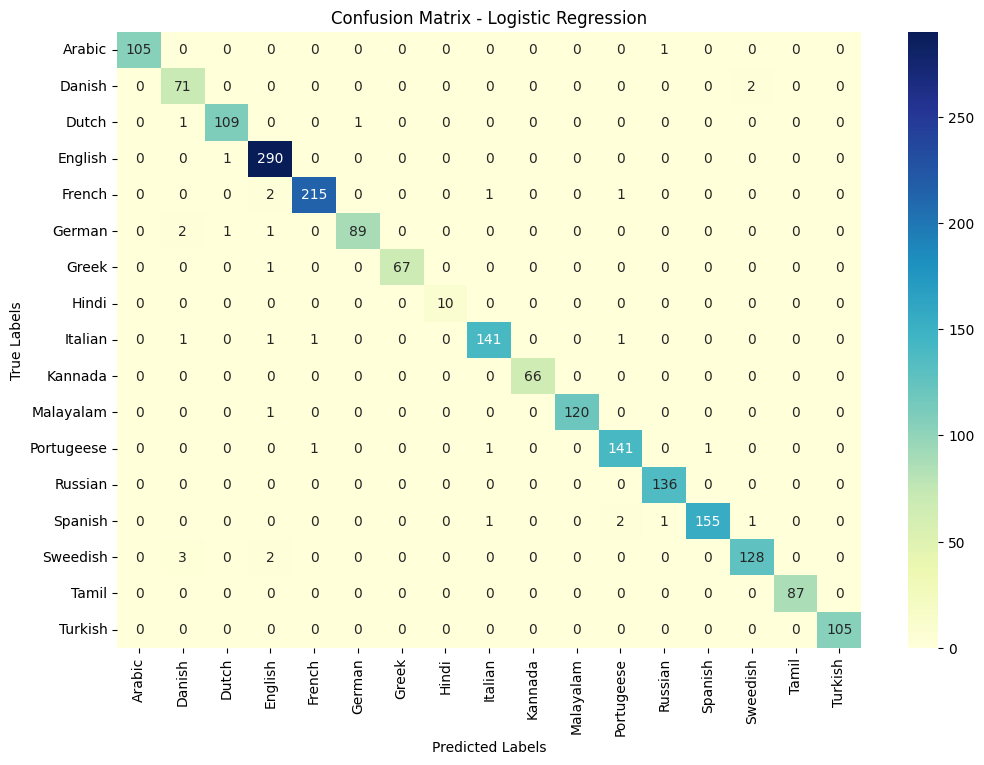

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=sorted(df['Language'].unique()), yticklabels=sorted(df['Language'].unique()))
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [14]:
model_pipe = Pipeline([('tfidf', tfidf), ('clf', LogisticRegression(max_iter=1000))])

In [15]:
model_pipe.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 3))),
                ('clf', LogisticRegression(max_iter=1000))])

In [16]:
def predict_language(text):
    prediction = model_pipe.predict([text])[0]
    return prediction

text_input = input("Enter a text to detect its language: ")
predicted_language = predict_language(text_input)

print(f"The predicted language is: {predicted_language}")

The predicted language is: English
